# MINST

Hand written number recognition

In [1]:
import pandas as pd

filename = "mnist_784.csv"
def load_mnist_dataset(filename  = filename):
    return pd.read_csv(filename)

In [2]:
mnist = load_mnist_dataset(filename)

> https://www.openml.org/d/554

In [3]:
import numpy as np
X, y = np.array(mnist.drop('class', axis = 1)), np.array(mnist["class"])

In [52]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [53]:
some_digit = X[36000]

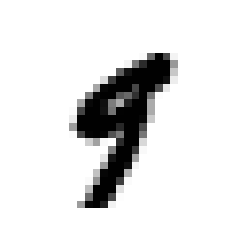

9


In [55]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
print(y[36000])


### Split the data into train and test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

We will training a classifer that can identify 5

In [5]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

**Stochastic Gradient Descent** (SGD) classifier has the advantage of being capable of handling very large datasets efficiently. And SGD deals with training instances indepently, one at a time.

So it suits online learning.

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
sum(sgd_clf.predict(X_test) == y_test_5)/len(X_test)

0.9482285714285714

### Performence Measures

#### Using Cross-Validation

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct/len(y_pred))



0.9689142857142857
0.9609714285714286
0.964


> StratifiedKFold produce the class contain a representative ratio of each calss.
> Each iteration, the code creates a clone of the classfier, train the clone on the training folds.
> Counts the number of correct predictions and output the ration of correct predictions

In [77]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.96891429, 0.96097143, 0.964     ])

it looks fantastic! it is over 90% accuracy!

However, it may not be true: Let's look at the dump classifier that just classifies every single image in the "not-5" class:

In [79]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.9104    , 0.91028571, 0.91085714])

It has over 90% accuracy! because only 10% of the images are "5"

### Confusion Matrix

using cross_validation to predict

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

Now we are ready to get confusion matrix.

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[46631,  1154],
       [ 1066,  3649]], dtype=int64)

|                 | predicted Negatvie | Predicted postive |\n
|-----------------|--------------------|-------------------|\n
| Actual Negative | TN                 | FP                |\n
| Actual Postive  | FN                 | TP                |

$$
precision = \frac{TP}{TP+FP}
$$
> 预测对了的真 除以 所有 预测的真

$$
recall = \frac{TP}{TP+FN}
$$
> 预测对了的真 除以 所有的真

### Confucsion Matrix

## Multiclass Classification

# MNIST with Small Datasets

In [9]:
from sklearn import datasets

sample_data = datasets.load_digits()

In [35]:
print(sample_data.target[:])
print(sample_data.images[4])

[0 1 2 ... 8 9 8]
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]


TypeError: 'int' object is not callable

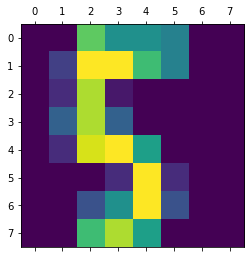

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(sample_data.images[25])

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(sample_data.data, sample_data.target)

KNN_model = KNeighborsClassifier(n_neighbors= 10)

KNN_model.fit(train_data, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [47]:
pred = KNN_model.predict(test_data)
print(pred[:10])
print(test_target[:10])

accu = (sum(pred == test_target))/len(pred)
print(accu)

[4 9 3 6 2 7 3 8 0 2]
[4 9 3 6 2 7 3 8 0 2]
0.98


In [52]:
len(sample_data.target)

1797

In [48]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(pred, test_target)
print(acc)

0.98
